downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/m/scikit_learn_data


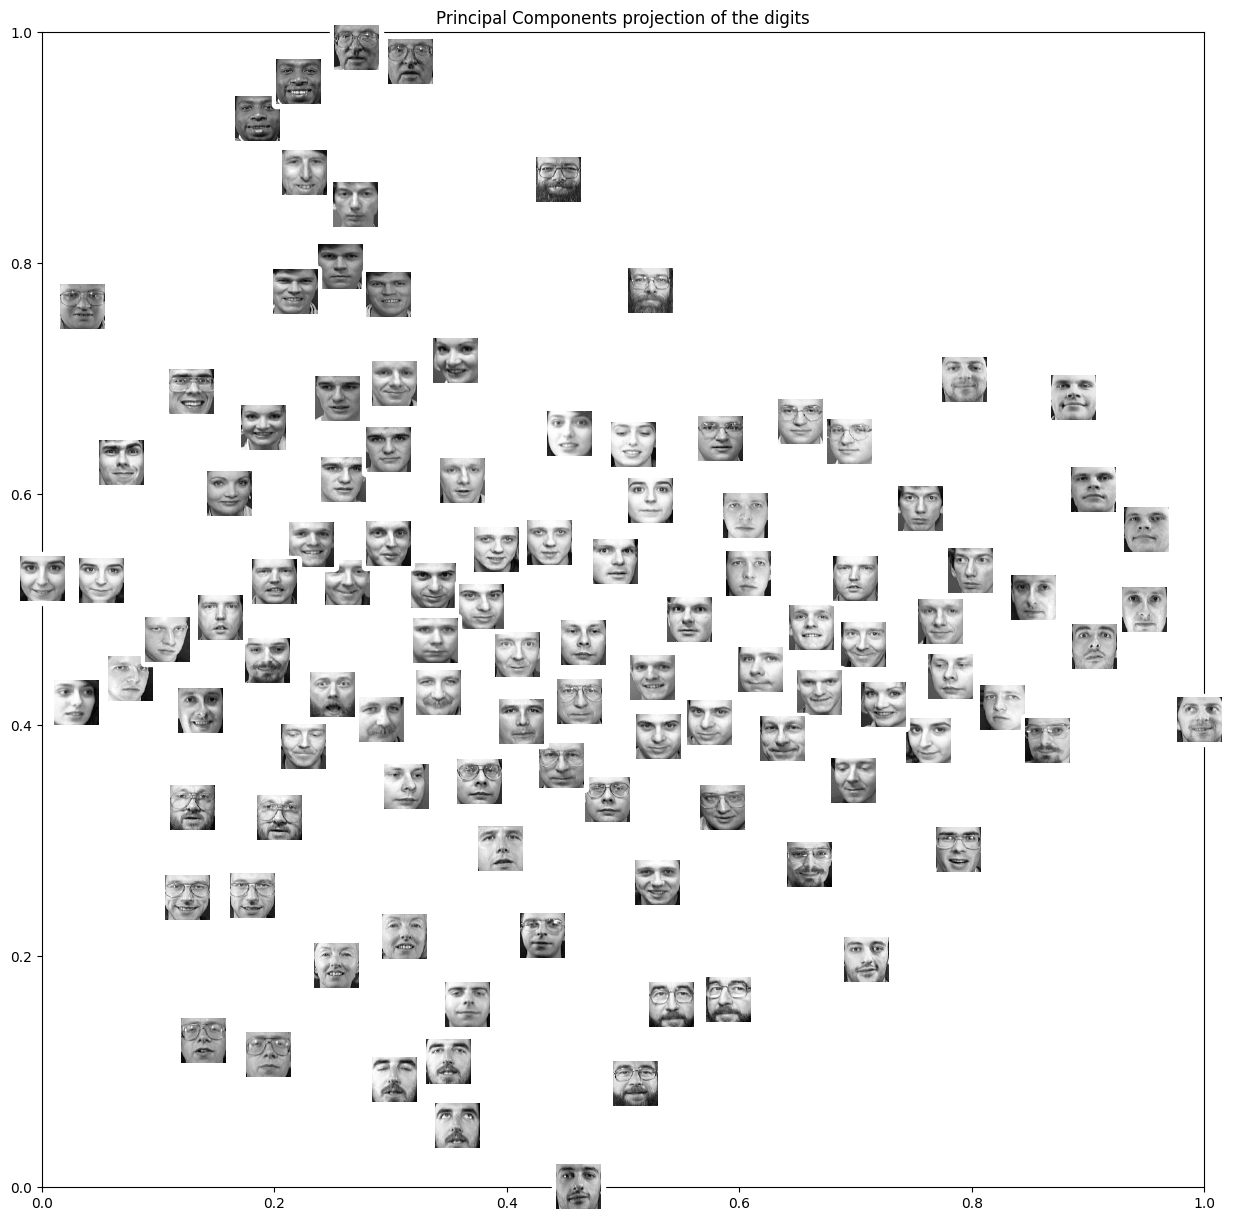

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
X = data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()